In [39]:
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
from fbprophet import Prophet
from dateutil.parser import parse

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
# Loading the test data in memory
test_df = pd.read_csv("/content/drive/MyDrive/Maersk/test_data_maersk.csv")

# Time Series Modeling and prediction for data where ***Manufacturer*** = ***X3***

In [41]:
# Loading the training data in memory
df = pd.read_csv("/content/drive/MyDrive/Maersk/x3_outlier_removed_df.csv")
df.head()

,Month of Sourcing,Sourcing Cost
0,Aug-20,54.56
1,Aug-20,48.25
2,Aug-20,50.92
3,Aug-20,62.45
4,Aug-20,36.06


In [42]:
# Converting the Month of Sourcing data from strinf to datetime format for training
df["Month of Sourcing"] = df["Month of Sourcing"].str.replace('-','-20')
df["Month of Sourcing"]= df.apply(lambda x: parse(x['Month of Sourcing']),axis=1)
df.head()

,Month of Sourcing,Sourcing Cost
0,2020-08-25,54.56
1,2020-08-25,48.25
2,2020-08-25,50.92
3,2020-08-25,62.45
4,2020-08-25,36.06


In [43]:
# Ordering the training data by Month of Sourcing (oldest to newest)
data = df
data.sort_values(by=["Month of Sourcing"])

,Month of Sourcing,Sourcing Cost
5929,2020-07-25,49.84
5568,2020-07-25,49.22
5567,2020-07-25,50.18
5566,2020-07-25,49.71
5565,2020-07-25,50.18
...,...,...
1696,2021-05-25,66.50
1697,2021-05-25,72.00
1698,2021-05-25,7.78
1689,2021-05-25,7.78


(0.0, 100.0)

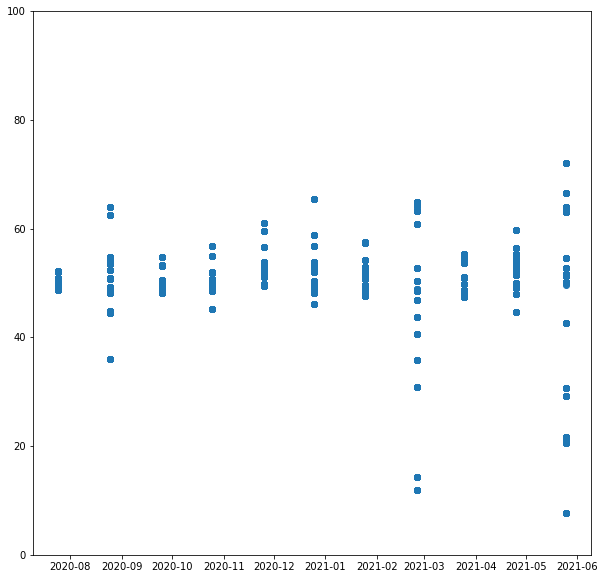

In [44]:
# Plottting the training data to visualize the scatter plot of the grouped time-series
plt.figure(figsize=(10,10))
plt.scatter(data["Month of Sourcing"], data["Sourcing Cost"])
plt.ylim((0,100))

In [45]:
# renaming the columns to symbolize the timestamp and the target
data = data.rename(columns={"Month of Sourcing":"ds", "Sourcing Cost":"y"})

In [46]:
# instantiating an object of Prophet Class (Using the Prophet Forecasting model developed by Facebook)
model = Prophet()
model.fit(data)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [47]:
# Making prediction on the filtered data
test_df = test_df[test_df["Manufacturer"]=="X3"]
test_df["Month of Sourcing"] = test_df["Month of Sourcing"].str.replace('-','-20')
test_df["Month of Sourcing"]= test_df.apply(lambda x: parse(x['Month of Sourcing']),axis=1)
test_df.reset_index(drop=True,inplace=True)
test_df = test_df.rename(columns={"Month of Sourcing":"ds", "Sourcing Cost":"y"})

pred = model.predict(test_df[["ds"]])
pred = pred["yhat"].to_list()

test_df["yhat"] = pred

print(test_df)

  ProductType Manufacturer Area Code  ...         ds      y      yhat
0        NTM3           X3       A22  ... 2021-06-25  40.73  49.64196

[1 rows x 9 columns]


In [48]:
# Computing the Absolute Error in model's performance
diff_col = test_df["y"] - test_df["yhat"]
test_df["Absolute Error"] = diff_col
test_df["Absolute Error"]= test_df.apply(lambda x: abs(x["Absolute Error"]),axis=1)
print(test_df)

  ProductType Manufacturer Area Code  ...      y      yhat Absolute Error
0        NTM3           X3       A22  ...  40.73  49.64196        8.91196

[1 rows x 10 columns]


In [49]:
print("The mean absolute error in Sourcing Cost for this model's prediction is  " + str(test_df["Absolute Error"].mean()))

The mean absolute error in Sourcing Cost for this model's prediction is  8.911960420449574
